In [1]:
# reload magic
%load_ext autoreload

### Computing set probabilities under well-ordered conditions

### Computing set probabilities in general

In general, we have to compute probabilites by enumeration. WE use the fact that $x$ is good if and only if $x \oplus 1^n$ is bad (these share a syndrome)
1. Compute and order probabilities of all error bitstrings 
2. the first $2^{n-1}$ are good examples, the remainder are bad examples
3. 

In [7]:
for y1, y2, y3, y4, y5 in zip(good_wt_hist.values(), unimp_wt_hist.values(), imp_wt_hist.values(), bad_wt_hist.values(), all_wt_hist.values()):
    # print(y1, y2, y3, y4, y5)
    print(y2 + y3 + y4, y5)
    assert math.isclose(y2 + y3 + y4, y5, rel_tol=1e-6)
    # print()

0.09573737512781393 0.09573737512781393
0.24068690718923064 0.24068690718923064
0.28472140010028285 0.28472140010028285
0.21070163887329948 0.21070163887329948
0.10939430914331813 0.10939430914331813
0.042360948847299386 0.042360948847299386
0.012697598713768396 0.012697598713768396
0.003018326273337592 0.003018326273337592
0.0005783040679284131 0.0005783040679284131
9.028858249493838e-05 9.028858249493815e-05
1.1567692716435313e-05 1.1567692716478454e-05
1.2209819077158173e-06 1.2209819077341452e-06
1.0630951934737939e-07 1.0630951934699337e-07
7.625769201243301e-09 7.62576920124419e-09
4.4888229949704055e-10 4.4888229949704055e-10
2.1531179838375608e-11 2.1531179838375608e-11
8.324317821635215e-13 8.324317821635215e-13
2.5522202243588404e-14 2.5522202243588404e-14
6.057209676168904e-16 6.057209676168904e-16
1.0721886417961394e-17 1.0721886417961394e-17
1.3315234221018666e-19 1.3315234221018666e-19
1.0344430283977987e-21 1.0344430283977987e-21
3.781473296336387e-24 3.781473296336387e-

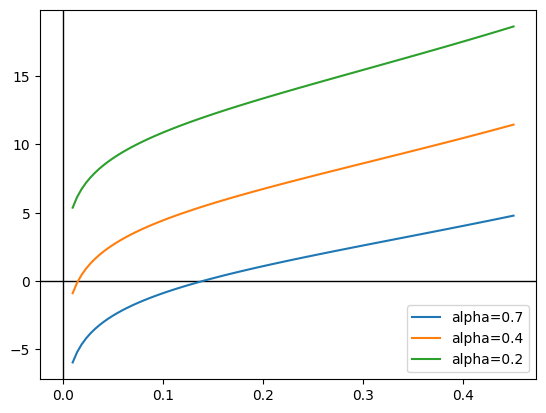

In [8]:
def not_well_orderedness(n, p1, p2):
    """If the not_well_orderedness is more than 0, then we are not well ordered."""
    return (n / 2) * (np.log(p1 / (1-p1)) - np.log(p2 / (1-p2))) + 2 * np.log(p2 / (1-p2))

x = np.linspace(0.01, 0.45, 100)
y  = {}
for alpha in [0.7, 0.4, 0.2]:
    yvals = []
    for p1 in x:
        p2 = p1 * alpha
        yvals.append(not_well_orderedness(n, p1, p2))
    y[alpha] = yvals
fig, ax = plt.subplots()
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
for alpha in [0.7, 0.4, 0.2]:
    ax.plot(x, y[alpha], label=f"alpha={alpha}")
ax.legend()

#### 4 specific alphas to compute

In [9]:
select_alphas = [0.44, 0.424, 0.41, 0.39]
# div = {}
diff = {}
transition = {}

x = np.linspace(0.01, 0.38, 100)
for alpha in select_alphas:
    # div[alpha] = []
    diff[alpha] = []
    well_ordered = True
    for p1 in x:
        p2 = p1 * alpha
        pr_important, pr_bad, new_well_ordered = compute_pr_important_bad(n, p1, p2)
        if well_ordered and not new_well_ordered:
            print(f"Transition at p1={p1}, p2={p2}")
            transition[alpha] = p1
            well_ordered = False
        # frac = pr_important / pr_bad
        difference = pr_important - pr_bad
        # print(pr_important, pr_bad, frac, difference)
        # div.append(frac)
        diff[alpha].append(difference)

    

Transition at p1=0.01, p2=0.0044


KeyboardInterrupt: 

### Phases of curriculum learning

Recall that $\alpha$ is a parameter of our system: it represents the biasedness of the noise model. The plots below look at, if we artificially tune $p_1$ (while preserving whatever bias there is), we can get very different results for curriculum learning. Regimes (from right to left):
1. The noise model is almost unbiased, meaning there is practically no advantage to increasing $p_1$
2. The noise model is just slightly biased. $\Delta$ grows as $p_1$ is increased (while maintaining well-orderedness), but the violations in well-orderedness don't hurt the performance of $f_0$ enough to make a substantial difference.
3. The noise model is modestly biased: $f^*$ greatly outperfroms $f_0$ due to the large violations in well-orderedness
4. The noise model is very biased: There is a substantial number of errors with $\text{wt}(E) > n/2$ that are more likely than their complement. The noise model becomes pathological

Scaling $p_1$ with alpha fixed simulates using a calibrated, biased noise model (where $p_i := \alpha_i p$) and just cranking up $p$.

Text(0, 0.5, 'Difference')

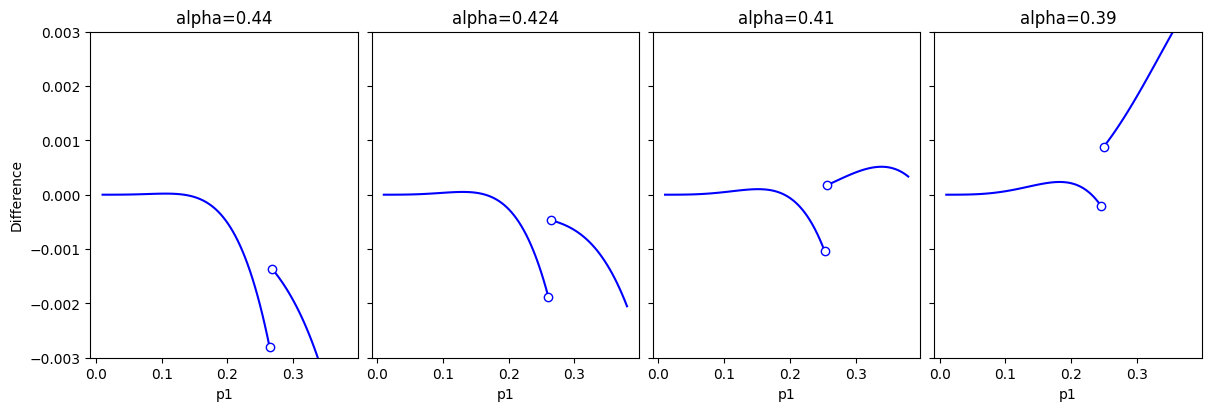

In [8]:
figs, axes = plt.subplots(1, len(select_alphas), figsize=(12, 4), constrained_layout=True, sharey=True)
ylim = (-0.003, 0.003)
for i, alpha in enumerate(select_alphas):
    # break x into before and after the transition
    saved = transition[alpha]
    x1 = x[x < saved]
    x2 = x[x >= saved]
    y1 = diff[alpha][:len(x1)]
    y2 = diff[alpha][-len(x2):]
    line, = axes[i].plot(x1, y1, label=f"alpha={alpha}", c='b')
    axes[i].plot(x1[-1], y1[-1], 'o',  markerfacecolor='w', color=line.get_color())
    line, = axes[i].plot(x2, y2, label=f"alpha={alpha}", c='b')
    axes[i].plot(x2[0], y2[0], 'o',  markerfacecolor='w', color=line.get_color())
    # axes[i].axvline(saved, color='r', linestyle='--')
    axes[i].set_xlabel('p1')
    axes[i].set_ylim(ylim)
    axes[i].set_title(f"alpha={alpha}")

axes[0].set_ylabel('Difference')


In [41]:
transition = {}

def z(p_imp, p_bad):
    p_good = 1 - p_bad
    p_unimp = p_good - p_imp
    diff = p_unimp - p_imp
    # return diff / (1 - 2*p_bad)**2
    return (p_imp) / (p_unimp) + (p_good / p_bad)

fineness = 100 # ~25 seconds
pmin = 0.13
pmax = 0.35
alphamin = 0.3
alphamax = 0.45
pvals = np.linspace(pmin, pmax, fineness)
alphas = np.linspace(alphamin, alphamax, fineness)
zs = np.zeros((len(alphas), len(pvals)))
imps = np.zeros((len(alphas), len(pvals)))
bads = np.zeros((len(alphas), len(pvals)))

for i, alpha in enumerate(alphas):
    well_ordered = True
    for j, p1 in enumerate(pvals):
        p2 = p1 * alpha
        pr_important, pr_bad, new_well_ordered = compute_pr_important_bad(n, p1, p2)
        if well_ordered and not new_well_ordered:
            # print(f"Transition at p1={p1}, p2={p2}")
            transition[alpha] = p1
            well_ordered = False
        difference = pr_important - pr_bad
        zs[i, j] = z(pr_important, pr_bad)
        imps[i, j] = ((1 - pr_bad) - pr_important) - pr_important # pr_unimp - pr_imp
        bads[i, j] = 1 / (1 - 2 * pr_bad) # error coeff

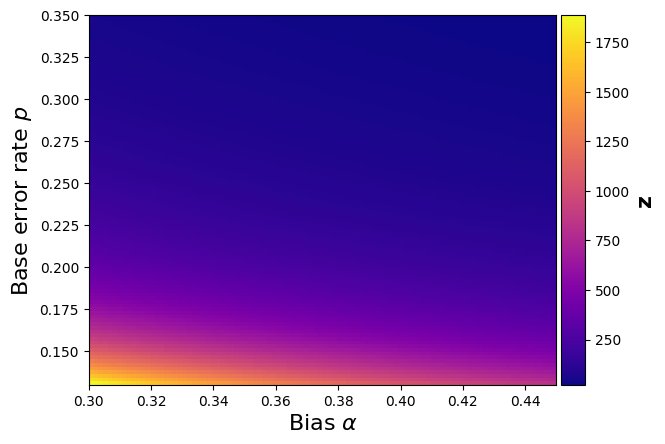

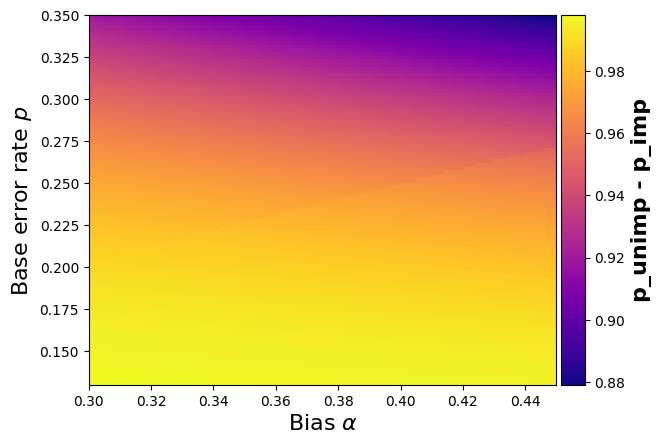

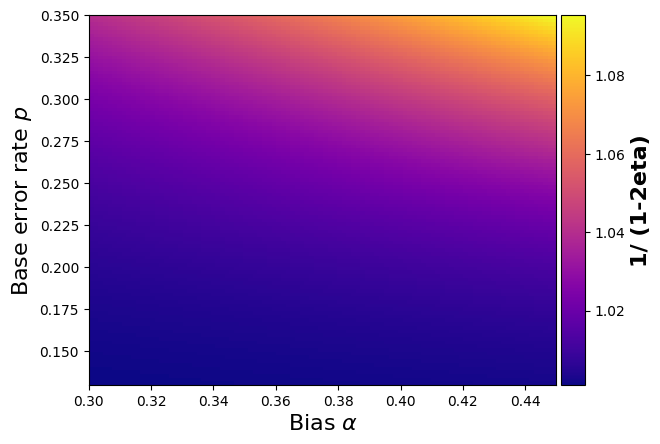

In [42]:
from matplotlib import colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
# colorplot of diffs

for target, label in zip([zs, imps, bads], ['z', 'p_unimp - p_imp', '1/ (1-2eta)']):
    fig, ax = plt.subplots()
    # 
    # cmap = 'bwr
    
    if label == 'z':
        cmap = 'plasma'
        im = ax.imshow(target.T, aspect='auto', 
                    extent=(alphas[0], alphas[-1], pvals[0], pvals[-1]), 
                    origin='lower', cmap=cmap, 
                    # norm=colors.CenteredNorm(),
                    interpolation="nearest") 
    else:
        cmap = 'plasma'
        im = ax.imshow(target.T, aspect='auto',
                    extent=(alphas[0], alphas[-1], pvals[0], pvals[-1]), 
                    origin='lower', cmap=cmap, 
                    interpolation="nearest")


    def set_ticklabels_to_3_sig_figs(ax):
        formatter = plt.FuncFormatter(lambda x, _: f'{x:.3g}')
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=10) 
    # cbar.set_label(label=r'$\text{Pr}(\text{important}) - \text{Pr}(\text{bad})$',weight='bold', size=16)
    cbar.set_label(label=label,weight='bold', size=16)
    # norm = DivergingNorm(vmin=diffs.min(), vcenter=0, vmax=diffs.max())
    # ax.set_xticklabels(pvals)
    # ax.set_yticklabels(alphas)
    # set_ticklabels_to_3_sig_figs(ax)
    ax.set_xlabel(r'Bias $\alpha$', size=16)
    ax.set_ylabel(r'Base error rate $p$', size=16)

    # fig.savefig('../../figures/important_bad_diffs.pdf', dpi=300, bbox_inches='tight')

In [3]:
# DATASET PARAMETERS
experiment_name = 'repetition_code_v1'

In [ ]:
# Make the repetition code dataset where the first half and last half of bits have different error rates

# tl;dr: make sure the number of bits is less than twice the number printed below.

# goodness check: for the v1 noise model, as long as the number of bitflips
# is less than this limit, then the weight-ordering of bitstrings matches 
# the likelihood ordering. In other words, if you generate all strings with num_bitflips
# k > lim, at least one weight-k bitstring will have lower prob. than some length-(k+1) bitstring
# ASSUMING k < n/2. The violation occurs when all k bitflips happen on the last n/2 bits, and
# k+1 bitflips happen in the first n/2 bits. if k >= n/2, then we are fine.

def bitflips_upper_limit_v1(p1, p2):
    return np.log2( (1-p1)/p1) / (np.log2(p1/p2) *(1-p2)/(1-p1) ) 

print(bitflips_upper_limit_v1(p1, p2))

5.961580428619441


In [ ]:
def repetition_pcm(n):
    out = []
    for i in range(n-1):
        out.append([0]*i + [1, 1] + [0]*(n-i-2))
    return np.array(out, dtype=np.uint8)


def sample_bitstring_v1(n, p1, p2, n_data):
    """Sample bitstrings from the biased bitflip model v1.
    
    Args:
        n: number of bits
        p1, p2: bitflip probabilities for the first and second half of the bits
        n_data: number of samples to generate
    
    Returns:
        (n_data, n) array of bitstrings
    """
    assert n % 2 == 0
    bitstrings = np.random.rand(n_data, n) < np.concatenate([p1*np.ones(n//2), p2*np.ones(n//2)])
    return bitstrings

def bitstring_prob_v1(s, n, p1, p2, permute=None):
    """Create a noise model where the first n//2 bits have prob. p1 of flipping, the last n//2 have prob. p2.
    
    ARgs:
        s: (n_data, n) array of bitstrings.
    Warning: if the difference in bias is too much, the weight-ordering of bitstrings 
     is no longer the same as likelihood ordering. make sure to check the bitflips_upper_limit_v1
    """
    if permute is not None:
        s = s[:,permute]
    p_first = np.prod(p1*s[:,:n//2] +(1-p1)*(1-s[:,:n//2]), axis=1)
    p_second = np.prod(p2*s[:,n//2:] + (1-p2)*(1-s[:,n//2:]), axis=1)
    return np.multiply(p_first, p_second)

def calculator(p1, p2):
    num = p1 ** 2 * (1-p2)**2
    denom = p2 ** 2 * (1-p1)**2
    return num / denom

calculator(0.1, 0.07)

In [14]:
# simulation parameters
n = 8
p1 = 0.1
p2 = 0.07
p1txt = str(p1).replace('.', '')
p2txt = str(p2).replace('.', '')
n_train_vals = np.logspace(10, 17, 9, base=2).astype(int)
n_train_vals = [10000]

In [ ]:

for n_train in n_train_vals:
    dirname = f'n{n}_N{n_train}_p1{p1txt}_p2{p2txt}'
    path = os.path.join(experiment_name, dirname)
    # Check if the data directory exists, if not create it
    if not os.path.exists(path):
        os.makedirs(path)

    Y_train = sample_bitstring_v1(n, p1, p2, n_train).astype(int)
    X_train = (Y_train @ repetition_pcm(n).T % 2).astype(int)
    np.save(f"{path}/X_train.npy", X_train)
    np.save(f"{path}/Y_train.npy", Y_train)

    Y_test = bit_tools.binarr(n)
    X_test = (Y_test @ repetition_pcm(n).T % 2).astype(int)
    weights_test = bitstring_prob_v1(Y_test, n, p1, p2)
    np.save(f"{path}/X_test.npy", X_test)
    np.save(f"{path}/Y_test.npy", Y_test)
    np.save(f"{path}/weights.npy", weights_test)

    # train_path = f"{path}/train.pkl"
    # val_path = f"{path}/test.pkl"
    # save_numpy_as_dict(X_train, train_path)
    # save_numpy_as_dict(Y_train, val_path)


### Grokking dataset

This dataset will contain only good examples, and about 90% of the necessary good examples. Since we plan to train until it learns optimal decoding, we won't weight the data and just provide a list of bitstrings

In [15]:
# The dataset has all bitstrings of <weight 4, and only ~half of the "good" bitstrings that have exactly weight 4
#  (where good bitstrings are themselves the bitstrings that are more likely than their logical negation)
wt_4_bitstrings = []
Y_train = []
for b in bit_tools.binarr(8):
    """For n = 8"""
    tot_count = 8
    if sum(b) < 4:
        Y_train.append(b)
    elif sum(b) > 4:
        break
    elif sum(b) == 4:
        if sum(b[:4]) == 3:
            wt_4_bitstrings.append(b)
        elif sum(b[:4]) == 4:
            Y_train.append(b)
# shuffle the weight 4 bitstrings
np.random.shuffle(wt_4_bitstrings)
# select just 8 of them to add to Y_train
Y_train += wt_4_bitstrings[:8]
Y_train = np.array(Y_train)
X_train = (Y_train @ repetition_pcm(8).T % 2).astype(int)
N = len(Y_train)
dirname = f'grok_n{n}_N{N}_p1{p1txt}_p2{p2txt}'
path = os.path.join(experiment_name, dirname)
if not os.path.exists(path):
    os.makedirs(path)
np.save(f"{path}/X_train.npy", X_train)
np.save(f"{path}/Y_train.npy", Y_train)

Y_test = bit_tools.binarr(n)
X_test = (Y_test @ repetition_pcm(n).T % 2).astype(int)
weights_test = bitstring_prob_v1(Y_test, n, p1, p2)
np.save(f"{path}/X_test.npy", X_test)
np.save(f"{path}/Y_test.npy", Y_test)
np.save(f"{path}/weights.npy", weights_test)